## Data analysis

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df_mk1        = pd.read_csv("clean_data/clean_data_mk1_i5pyilec.csv")
df_mk2        = pd.read_csv("clean_data/clean_data_mk2_dzoz67y9.csv")
df_mk3        = pd.read_csv("clean_data/clean_data_mk3_mklqs5l0.csv")
df_mk4        = pd.read_csv("clean_data/clean_data_mk4_080ps8pg.csv")
combined_data = pd.read_csv("clean_data/combined_data/combined_data.csv")

In [4]:
#Exclude participants
combined_data = combined_data.loc[combined_data["prolific_id"] != "I am the experimenter."] #exclude us, i.e. player 4 in first pilot
combined_data = combined_data.loc[combined_data["participant_code"] != "j89thiah"] #exclude woman with baby in session 1, i.e. player 5 in first pilot.
combined_data = combined_data.loc[combined_data["participant_code"] != "97ajc1w1"] #exclude p4 in session Mklqs5l0, was inactive during entire thing except for round 1 (dropout)- 

## Acceptance rate of offers

In [5]:
#Create unique players
combined_data["player"] = combined_data["player"].astype(str)
combined_data["player"] = combined_data["player"] + combined_data["prolific_id"]

#combine session code with mastok session
combined_data['mk_session'] = combined_data['mk_session'].replace('mk:Ultimatum_Game_Real:', 'mk_', regex=True)
combined_data['mk_session'] = combined_data['mk_session'] + "_" + combined_data['session_code']

#Create a new column for manip of other player in each dyad. 
combined_data["other_manipulation"] = np.where(combined_data["manipulation"] == "dominant", "submissive", "dominant")
#Create a new column categorizing sent offers as either fair or unfair. 1 = fair, 0 = unfair
combined_data["fair_offer"]         = np.where(combined_data["sent_amount"] >=5, 1, 0)

0.9491094147582697
0.7904761904761904
fair_offer
0    0.742857
1    0.993808
Name: offer_response, dtype: float64
other_manipulation
dominant      0.949239
submissive    0.948980
Name: offer_response, dtype: float64
other_manipulation
dominant      187.0
submissive    186.0
Name: offer_response, dtype: float64
mk_session
mk_1_i5pyilec    0.973684
mk_2_dzoz67y9    0.879310
mk_3_mklqs5l0    1.000000
mk_4_080ps8pg    0.966667
Name: offer_response, dtype: float64


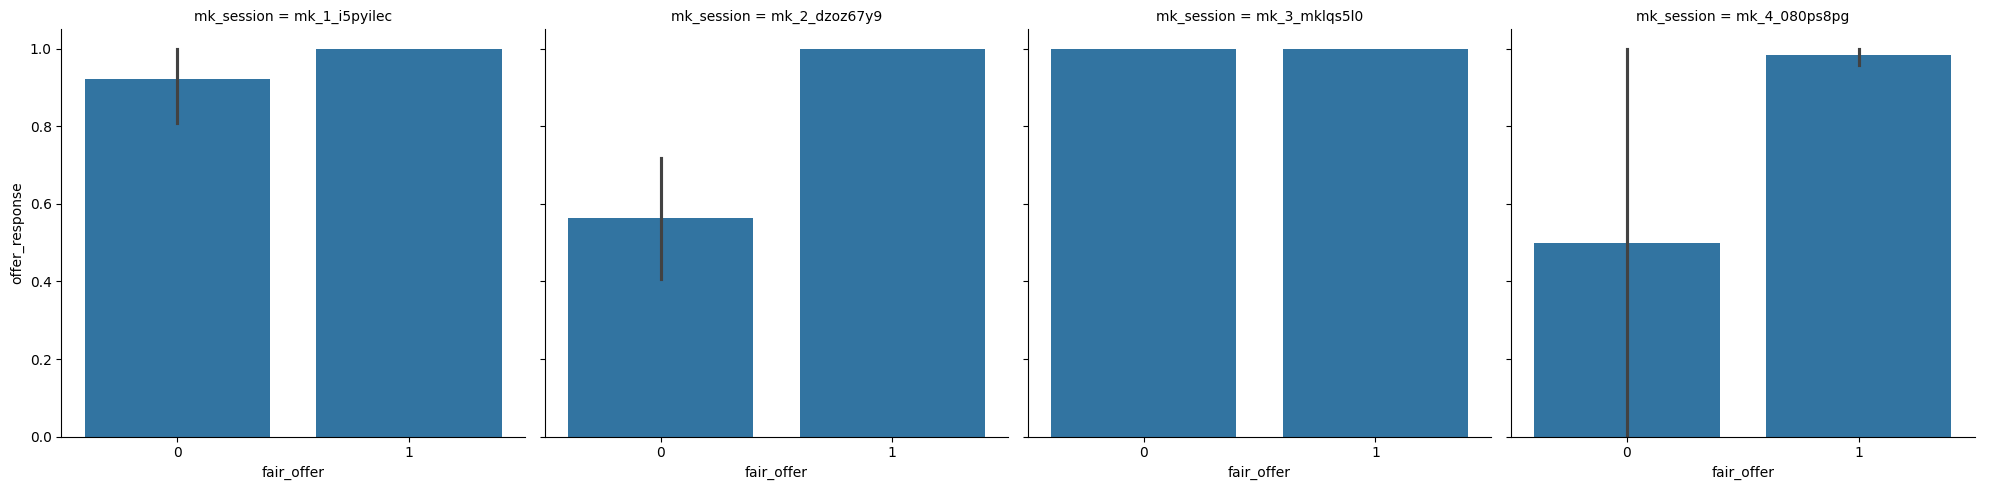

In [17]:

print(combined_data["offer_response"].mean()) #94.9 of offers are accepted. 
print(combined_data["fair_offer"].mean()) #79% of offers are fair. 
print(combined_data.groupby("fair_offer")['offer_response'].mean())
#   fair_offer        mean
#       0           0.742857
#       1           0.993808

print(combined_data.groupby(["other_manipulation"])['offer_response'].mean())

#    other_manipulation       mean
#     dominant               0.949239
#    submissive              0.948980

print(combined_data.groupby(["other_manipulation"])['offer_response'].sum())
#   other_manipulation        sum
#       dominant             187.0
#       submissive           186.0

print(combined_data.groupby(["mk_session"])['offer_response'].mean())

#     mk_session        mean
#    mk_1_i5pyilec    0.973684
#    mk_2_dzoz67y9    0.879310
#    mk_3_mklqs5l0    1.000000
#    mk_4_080ps8pg    0.966667


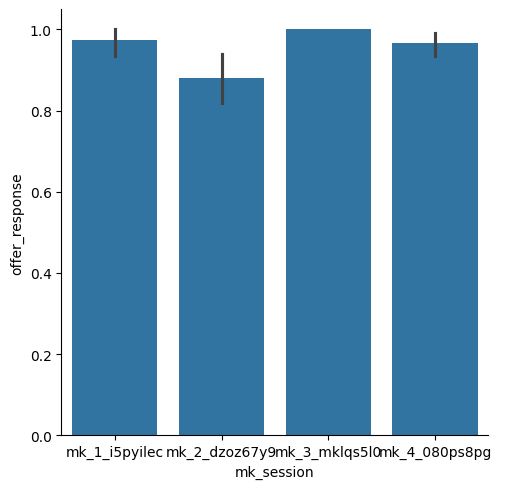

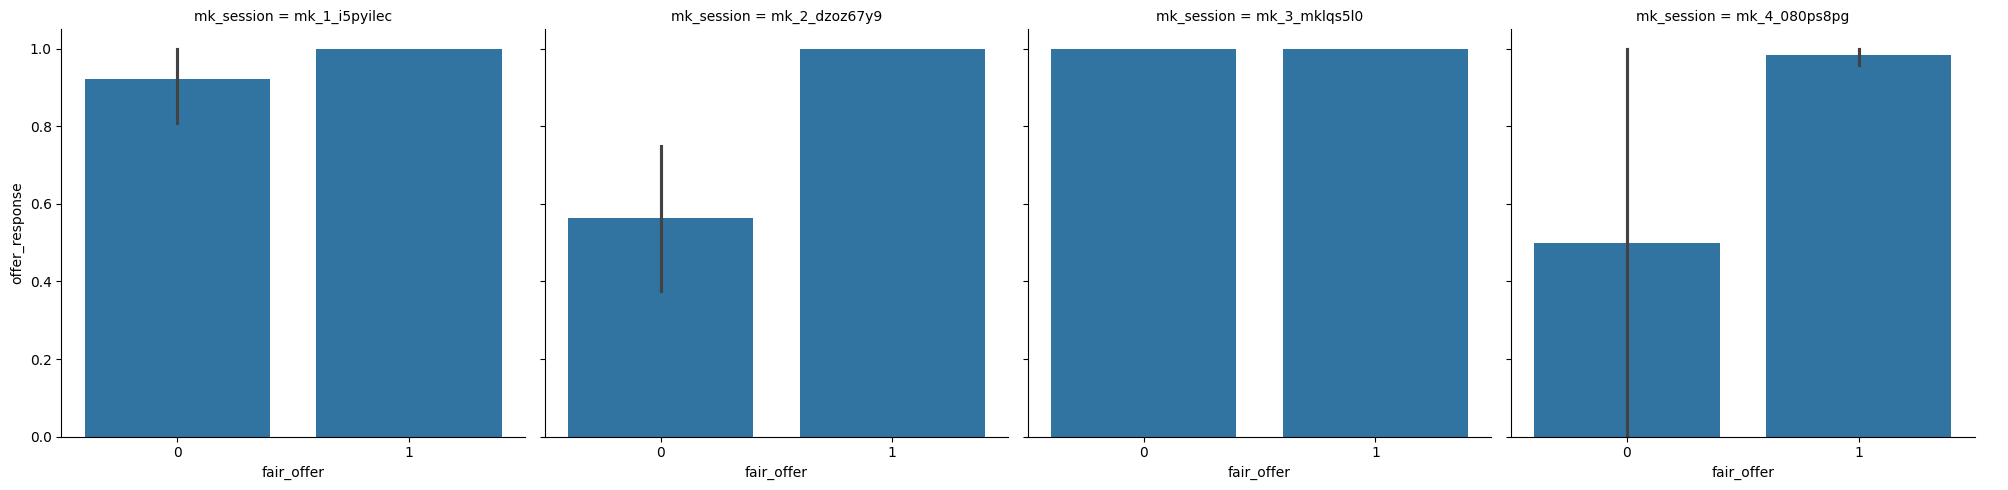

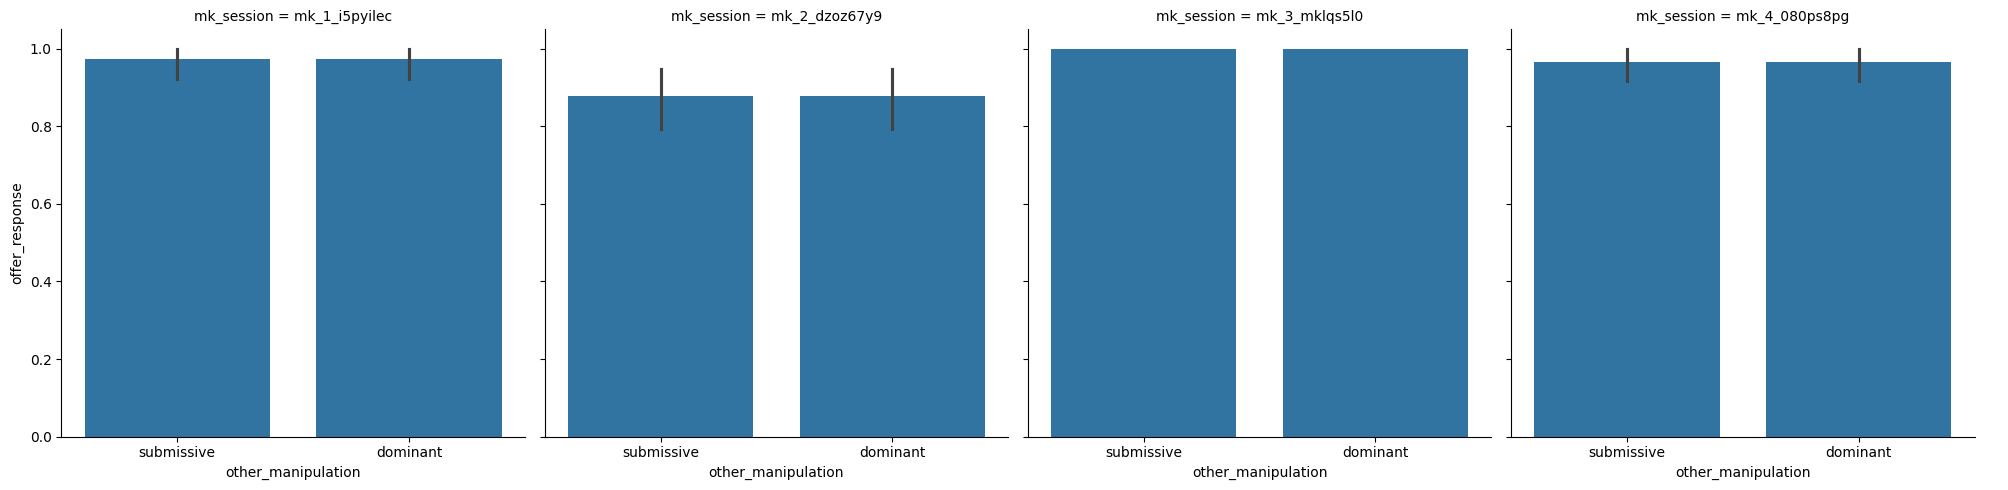

In [19]:
#SOME PLOTS

sns.catplot(x = "mk_session", y = "offer_response", kind = "bar", data = combined_data)

#fair_mk = combined_data.groupby(["mk_session", "fair_offer"])['offer_response'].mean().reset_index()
sns.catplot(x = "fair_offer", y = "offer_response", col = "mk_session", kind = "bar", data = combined_data)

sns.catplot(x = "other_manipulation", y = "offer_response", kind = "bar", col = "mk_session", data = combined_data)

## Trial Payoff

4.442857142857143
manipulation
dominant      4.471429
submissive    4.414286
Name: trial_payoff, dtype: float64
manipulation  mk_session   
dominant      mk_1_i5pyilec    4.675000
              mk_2_dzoz67y9    4.266667
              mk_3_mklqs5l0    4.040000
              mk_4_080ps8pg    4.900000
submissive    mk_1_i5pyilec    4.600000
              mk_2_dzoz67y9    4.233333
              mk_3_mklqs5l0    4.060000
              mk_4_080ps8pg    4.766667
Name: trial_payoff, dtype: float64


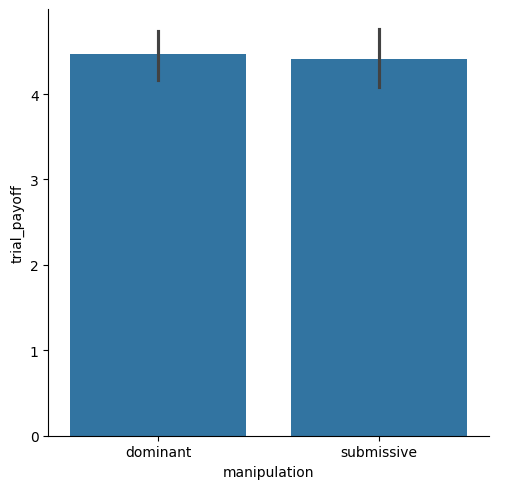

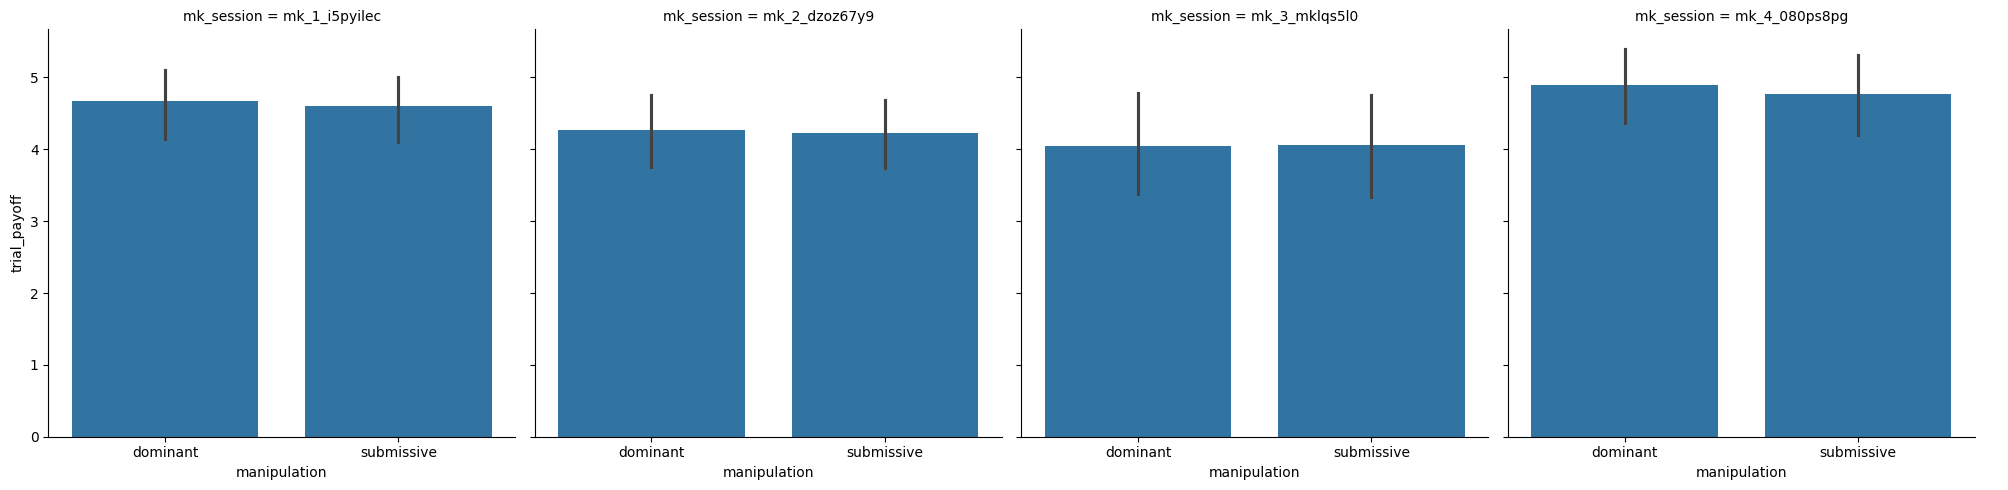

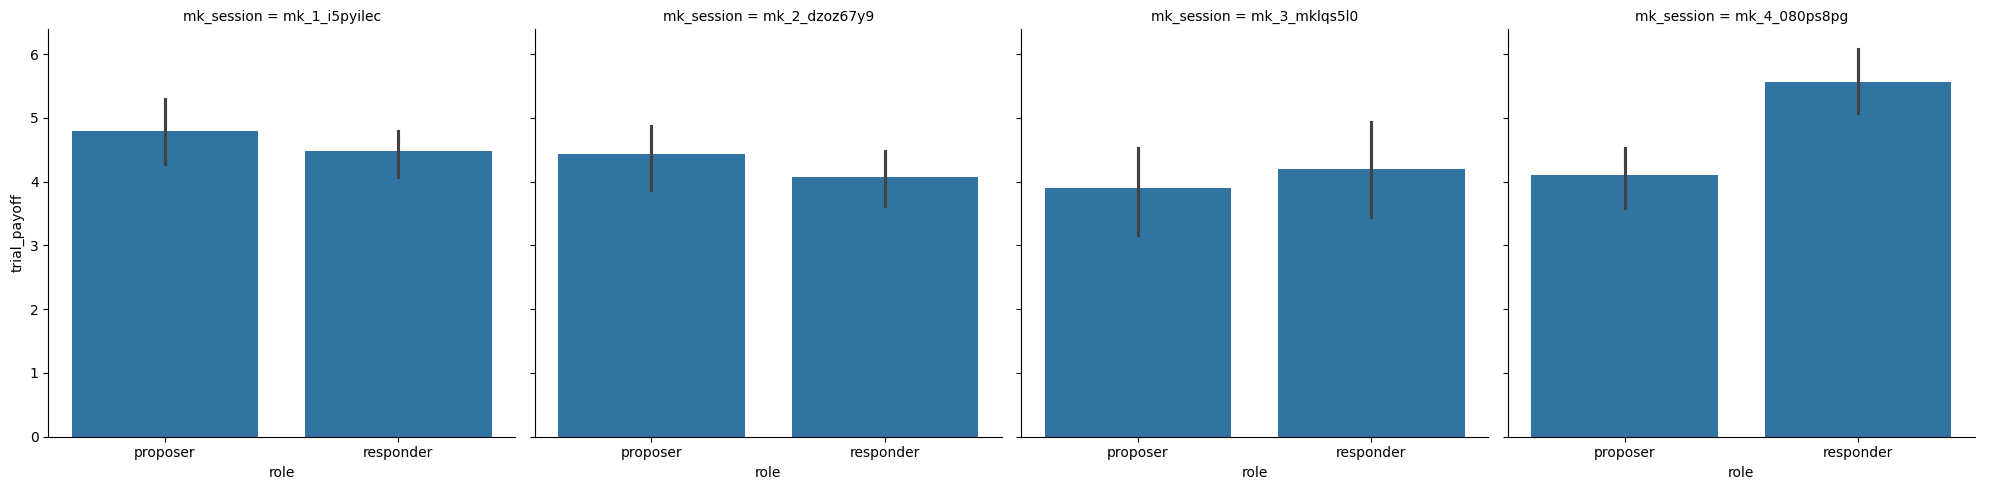

In [57]:
print(combined_data["trial_payoff"].mean()) #4.44
print(combined_data.groupby(["manipulation"])['trial_payoff'].mean())
#   manipulation       mean
#   dominant        4.471429
#   submissive      4.414286


print(combined_data.groupby(["manipulation", "mk_session"])['trial_payoff'].mean())

#Plot trial_payoff for dominant and submissive. 
df_analysis = combined_data.groupby(["manipulation", "player"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "manipulation", y = "trial_payoff", data = df_analysis, kind = "bar")

#The same plot grouped by session
sns.catplot(x = "manipulation", y = "trial_payoff", data = combined_data, kind = "bar", col = "mk_session")
# manipulation  mk_session      trial_payoff 
#dominant      mk_1_i5pyilec    4.675000
#              mk_2_dzoz67y9    4.266667
#              mk_3_mklqs5l0    4.040000
#              mk_4_080ps8pg    4.900000
#submissive    mk_1_i5pyilec    4.600000
#              mk_2_dzoz67y9    4.233333
#              mk_3_mklqs5l0    4.060000
#              mk_4_080ps8pg    4.766667

sns.catplot(x = "role", y = "trial_payoff", data = combined_data, kind = "bar", col = "mk_session")

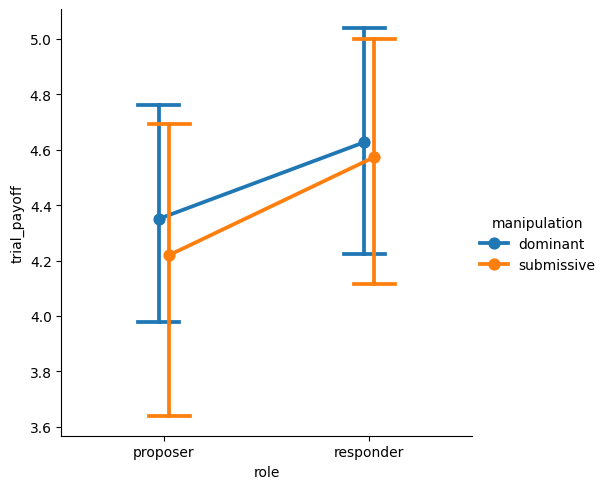

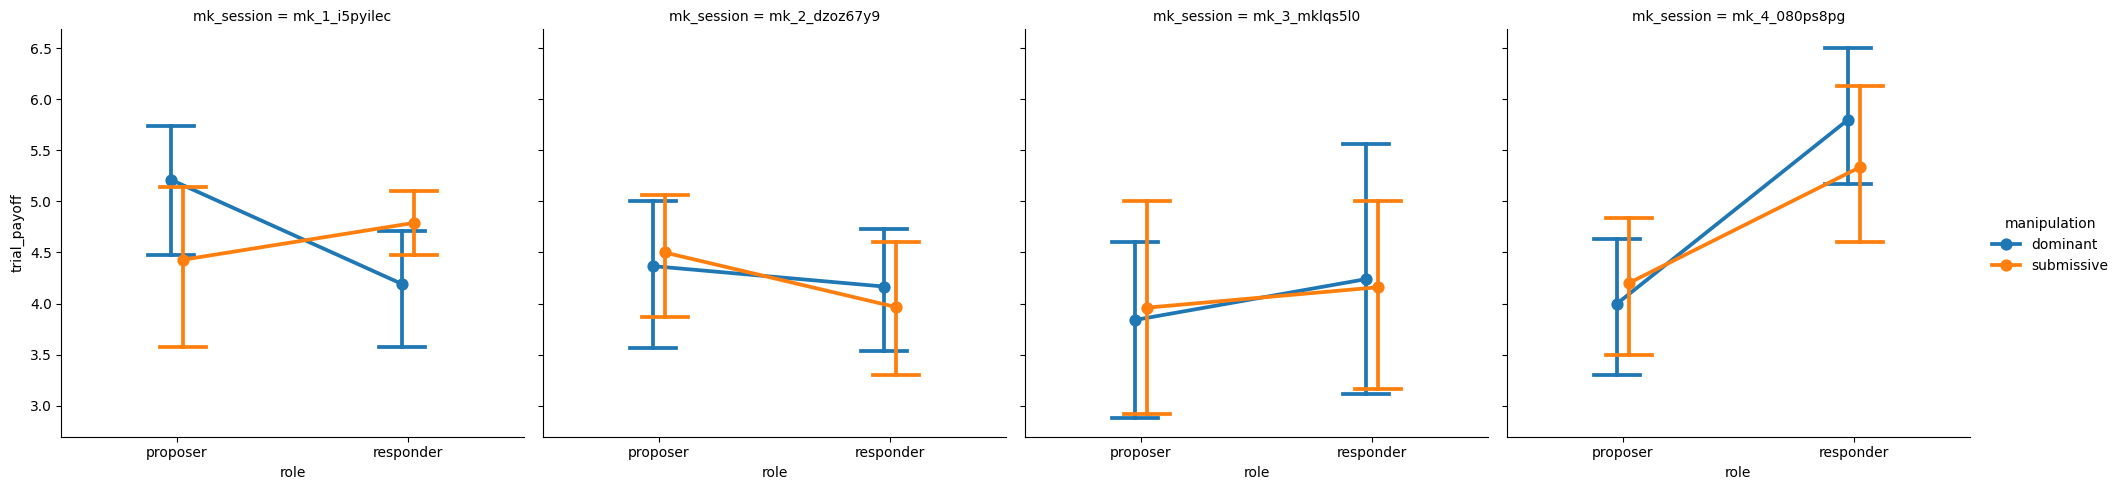

In [36]:
df_analysis = combined_data.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", kind = "point", data = df_analysis, dodge= True, capsize = .2)

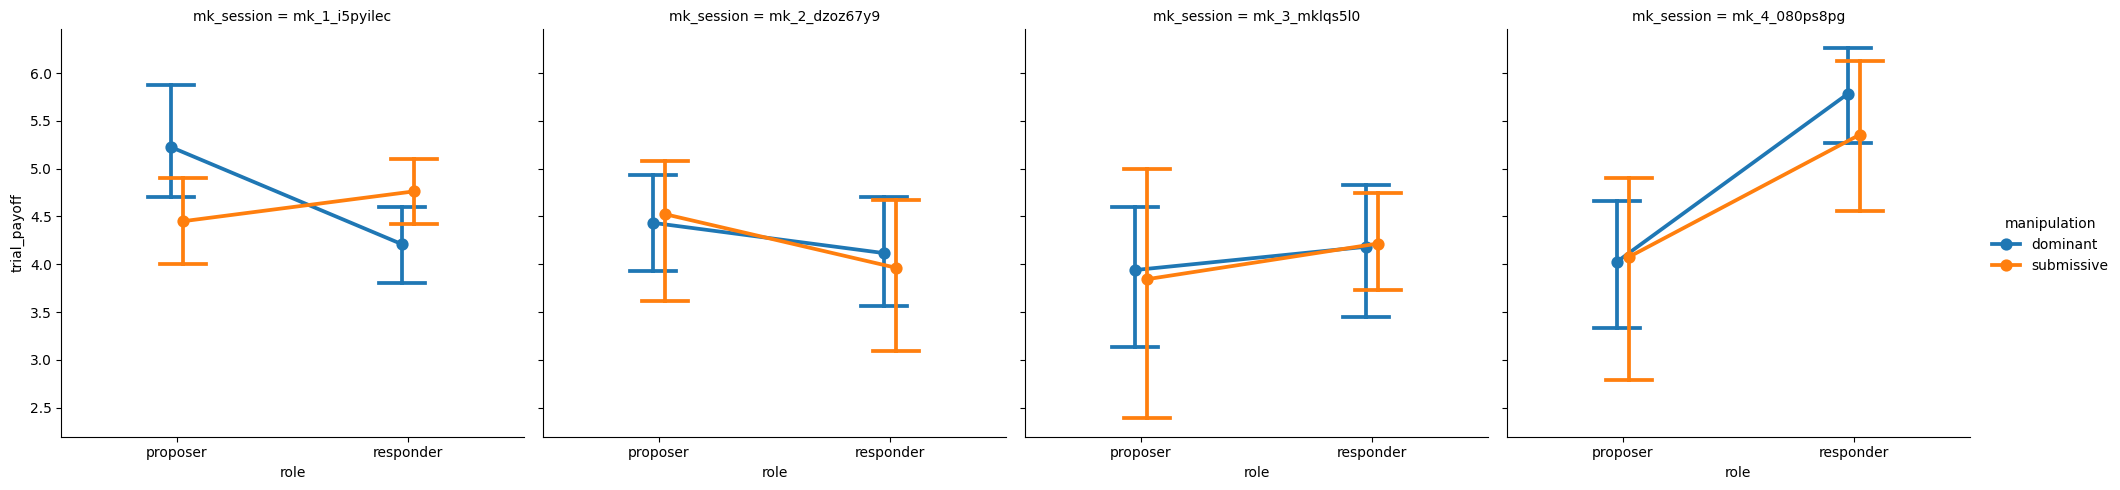

In [52]:
df_mk1 = combined_data.loc[combined_data["mk_session"] == "mk_1_i5pyilec"] 
df_mk2 = combined_data.loc[combined_data["mk_session"] == "mk_2_dzoz67y9"] 
df_mk3 = combined_data.loc[combined_data["mk_session"] == "mk_3_mklqs5l0"] 
df_mk4 = combined_data.loc[combined_data["mk_session"] == "mk_4_080ps8pg"] 


df_analysis_mk1 = df_mk1.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
df_analysis_mk1["mk_session"] = "mk_1_i5pyilec"

df_analysis_mk2 = df_mk2.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
df_analysis_mk2["mk_session"] = "mk_2_dzoz67y9"

df_analysis_mk3 = df_mk3.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
df_analysis_mk3["mk_session"] = "mk_3_mklqs5l0"

df_analysis_mk4 = df_mk4.groupby(["player","manipulation", "role"])['trial_payoff'].mean().reset_index()
df_analysis_mk4["mk_session"] = "mk_4_080ps8pg"

df_analysis_combined = pd.concat([df_analysis_mk1, df_analysis_mk2, df_analysis_mk3, df_analysis_mk4], ignore_index=True)

sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", col = "mk_session", kind = "point", data = df_analysis_combined, dodge= True, capsize = .2)


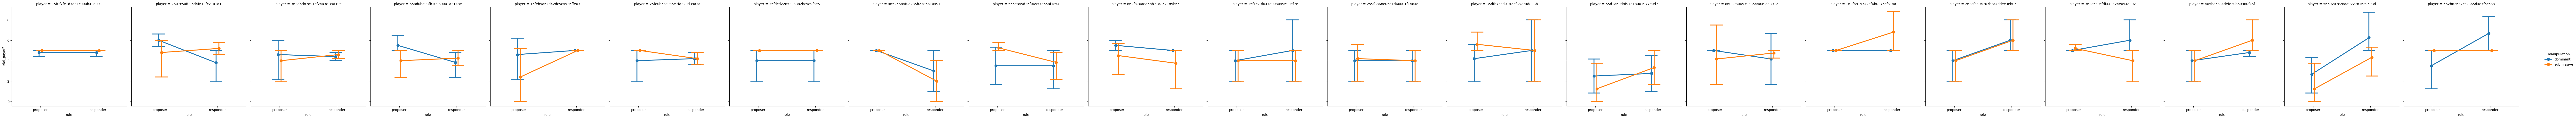

In [79]:
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", col = "player", kind = "point", data = combined_data, dodge= True, capsize = .2)

### Reaction time

In [132]:
df_analysis = combined_data.groupby(["prolific_id","role", "manipulation"])['rt'].mean().reset_index()

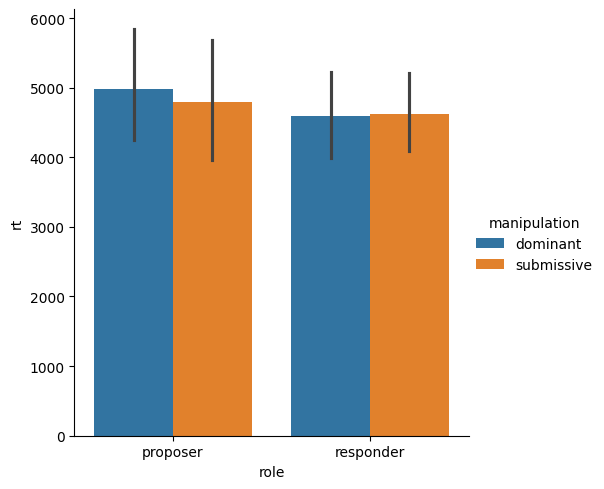

In [133]:
sns.catplot(x = "role", y = "rt", hue = "manipulation", kind = "bar", data = df_analysis)

## Social Measures

<Axes: xlabel='mean_social_dominance', ylabel='Count'>

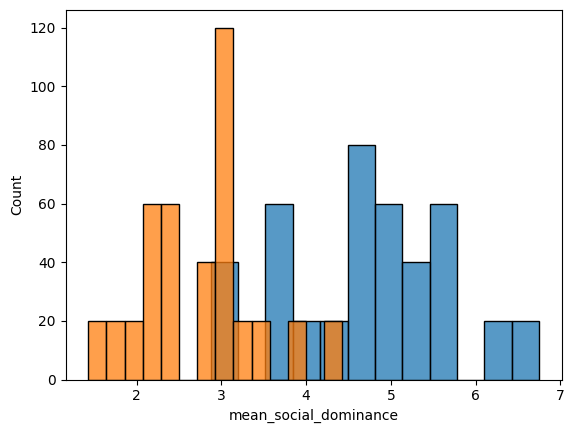

In [74]:
sns.histplot(x = "mean_social_dominance", data=combined_data)
sns.histplot(x = "mean_aggresive_dominance", data=combined_data)

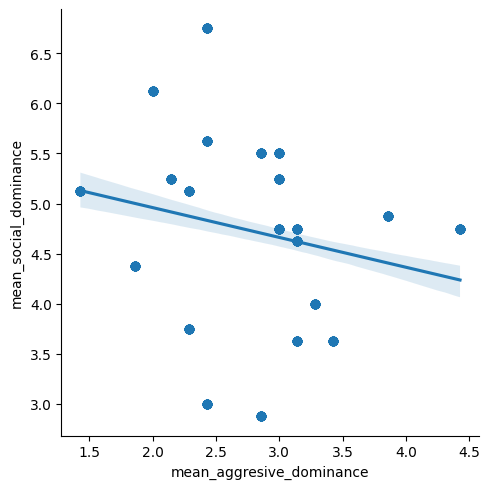

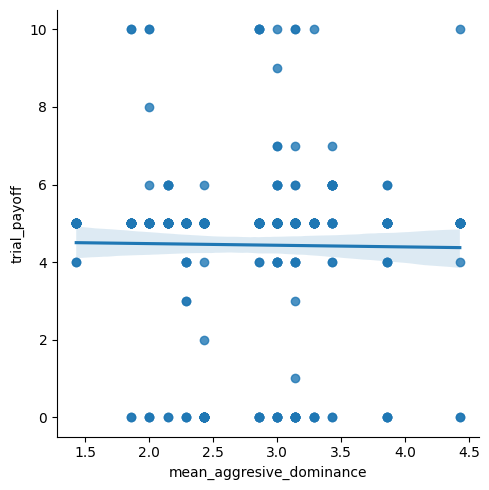

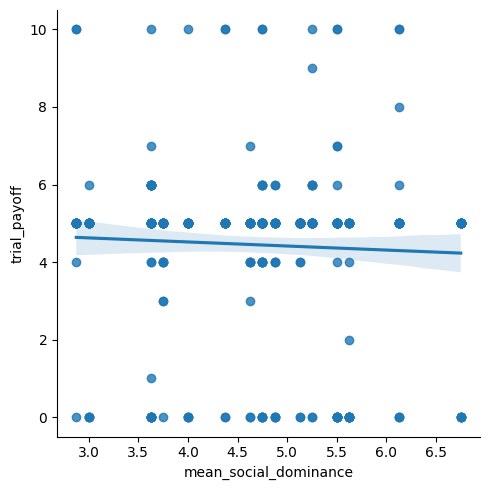

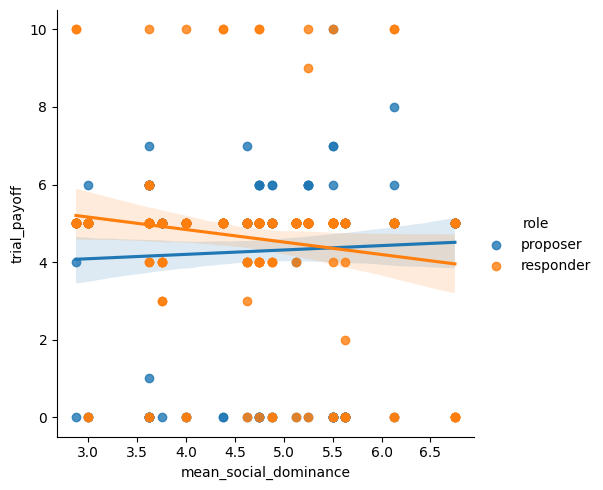

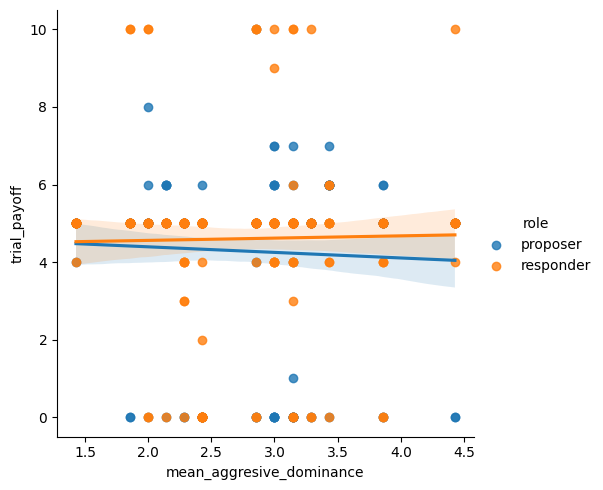

In [65]:
sns.lmplot(x = "mean_aggresive_dominance", y= "mean_social_dominance", data=combined_data)
sns.lmplot(x = "mean_aggresive_dominance", y= "trial_payoff", data=combined_data)
sns.lmplot(x = "mean_social_dominance", y= "trial_payoff", data=combined_data)
sns.lmplot(x = "mean_social_dominance", y= "trial_payoff",hue = "role", data=combined_data)
sns.lmplot(x = "mean_aggresive_dominance", y= "trial_payoff",hue = "role", data=combined_data)

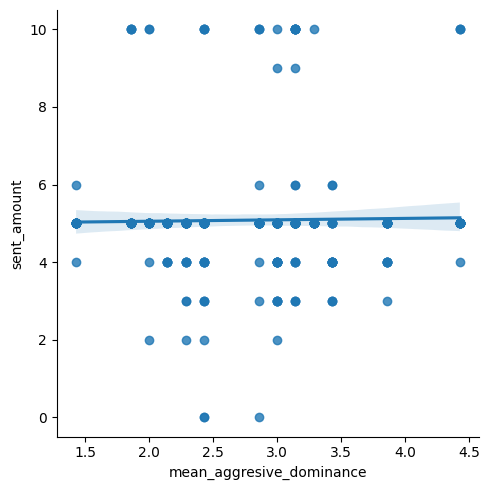

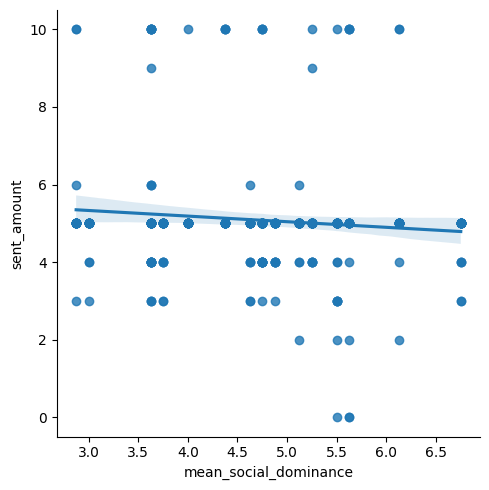

In [67]:
sns.lmplot(x = "mean_aggresive_dominance", y= "sent_amount", data=combined_data)
sns.lmplot(x = "mean_social_dominance", y= "sent_amount", data=combined_data)